In [1]:
import sys
import onnxruntime as ort
import numpy as np
from IPython.display import Image
from pathlib import Path
import matplotlib.pyplot as plt

sys.path.append('../')
from dataloading.nvidia import NvidiaValidationDataset

In [2]:
model = ort.InferenceSession('../_models/classifier-driven-feather-best.onnx', providers=['CUDAExecutionProvider'])

def predict(img):
    img = img.transpose(2, 0, 1)
    out_rad = model.run(None, {'x': np.expand_dims(img, 0)})[0]
    out_deg = np.degrees(out_rad)
    return out_deg

In [3]:
dataset = NvidiaValidationDataset(Path('/data/Bolt/end-to-end/rally-estonia-cropped'))

/data/Bolt/end-to-end/rally-estonia-cropped/2021-05-28-15-19-48_e2e_sulaoja_20_30: length=10708, filtered=0
/data/Bolt/end-to-end/rally-estonia-cropped/2021-06-07-14-20-07_e2e_rec_ss6: length=25836, filtered=1
/data/Bolt/end-to-end/rally-estonia-cropped/2021-06-07-14-06-31_e2e_rec_ss6: length=3003, filtered=0
/data/Bolt/end-to-end/rally-estonia-cropped/2021-06-07-14-09-18_e2e_rec_ss6: length=4551, filtered=1
/data/Bolt/end-to-end/rally-estonia-cropped/2021-06-07-14-36-16_e2e_rec_ss6: length=25368, filtered=1
/data/Bolt/end-to-end/rally-estonia-cropped/2021-09-24-14-03-45_e2e_rec_ss11_backwards: length=25172, filtered=0
/data/Bolt/end-to-end/rally-estonia-cropped/2021-10-26-10-49-06_e2e_rec_ss20_elva: length=33045, filtered=0
/data/Bolt/end-to-end/rally-estonia-cropped/2021-10-26-11-08-59_e2e_rec_ss20_elva_back: length=33281, filtered=0
/data/Bolt/end-to-end/rally-estonia-cropped/2021-10-20-15-11-29_e2e_rec_vastse_ss13_17_back: length=26763, filtered=0
/data/Bolt/end-to-end/rally-estoni

In [ ]:
left_turn = dataset.frames[dataset.frames.steering_angle > 0.75].iloc[0]
left_turn_img_path = left_turn.image_path
left_turn_angle = left_turn.steering_angle

stright = dataset.frames[abs(dataset.frames.steering_angle) < 0.001].iloc[0]
straight_img_path = stright.image_path
stright_angle = stright.steering_angle

right_turn = dataset.frames[dataset.frames.steering_angle < -0.75].iloc[0]
right_turn_img_path = right_turn.image_path
right_turn_angle = right_turn.steering_angle

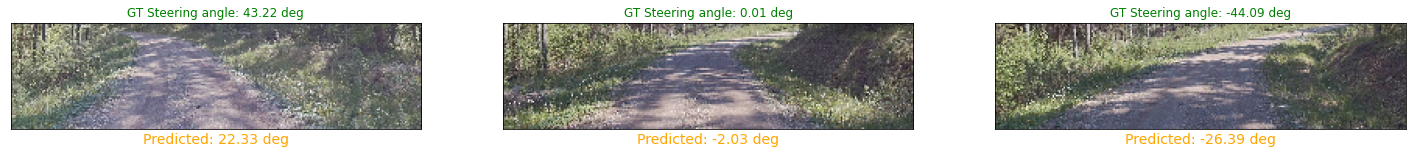

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(25, 20))

plt.rc('axes', titlesize=12)    # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels

left_turn_img = plt.imread(left_turn_img_path)
left_turn_pred = predict(left_turn_img).item()
axes[0].imshow(left_turn_img)
axes[0].set_title(f'GT Steering angle: {np.degrees(left_turn_angle):.2f} deg', color='green')
axes[0].set_xlabel(f'Predicted: {left_turn_pred:.2f} deg', color='orange')
axes[0].set_xticks([])
axes[0].set_yticks([])

straight_img = plt.imread(straight_img_path)
straight_pred = predict(straight_img).item()
axes[1].imshow(straight_img)
axes[1].set_title(f'GT Steering angle: {np.degrees(stright_angle):.2f} deg', color='green')
axes[1].set_xlabel(f'Predicted: {straight_pred:.2f} deg', color='orange')
axes[1].set_xticks([])
axes[1].set_yticks([])

right_turn_img = plt.imread(right_turn_img_path)
right_turn_pred = predict(right_turn_img).item()
axes[2].imshow(right_turn_img)
axes[2].set_title(f'GT Steering angle: {np.degrees(right_turn_angle):.2f} deg', color='green')
axes[2].set_xlabel(f'Predicted: {right_turn_pred:.2f} deg', color='orange')
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.show()